In [2]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import cv2
import extcolors
import skimage
import scipy
from PIL import Image
import math
import skimage
from sklearn.linear_model import LinearRegression
import pandas as pd
from colormap import rgb2hex
import numpy as np
import cv2
import os

VID = 0
SING_IMG = 1
mode = SING_IMG
crop_tbd = 4

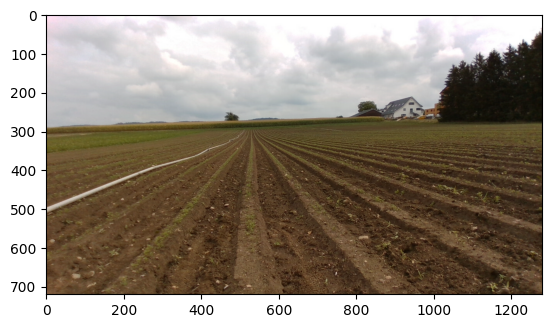

In [4]:
image_folder = '/home/roxane/Desktop/M3_2022/Caterra/dataset_straigt_lines'
name_images = 'crop_row_008.JPG'
image_folder = '/home/roxane/Desktop/M3_2022/USB/Realsense_18-08-2022_10-46-58/' # '/home/roxane/Desktop/M3_2022/Caterra/dataset_straigt_lines'
name_images = 'rgb000.jpg'

img = cv2.imread(os.path.join(image_folder, name_images))

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)


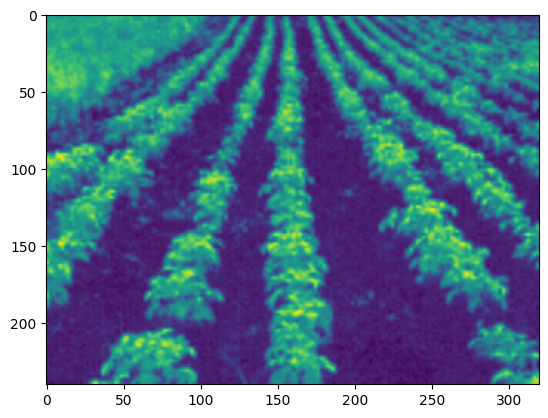

In [35]:
img_green = (2*img[:,:,1]-img[:,:,0]-img[:,:,2])
plt.imshow(img_green)

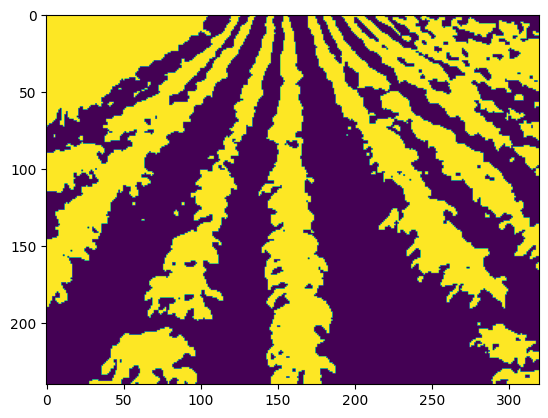

In [40]:
# Apply Otsu's thresholding
ret, thresh = cv2.threshold(img_green, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh)

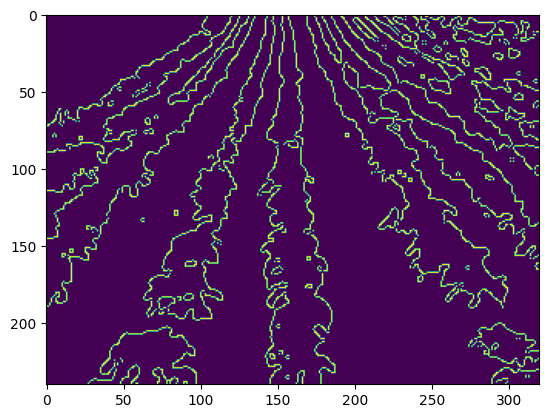

In [41]:
img_green_edge = cv2.Canny(thresh,100,200)
plt.imshow(img_green_edge)

In [43]:
# Run Hough transform on the edge-detected image
lines = cv2.HoughLines(img_green_edge, 1, np.pi/180, 60)
print(lines.shape)

(8, 1, 2)


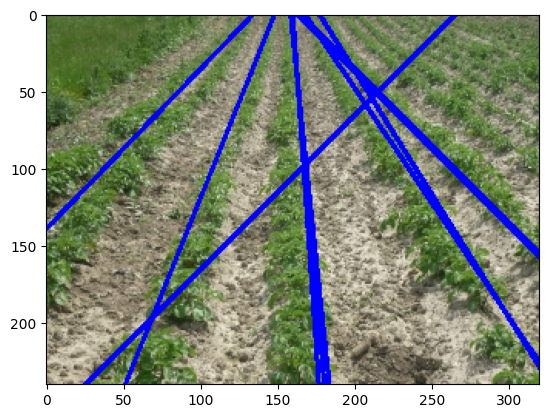

In [45]:
# Run Hough transform on the edge-detected image
lines = cv2.HoughLines(img_green_edge, 1, np.pi/180, 70)

# Iterate over the output "lines" and draw them
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img, (x1,y1), (x2,y2), (0,0,255), 2)

plt.imshow(img)